# **Question 3. Camera Calibration Using April Tags**

First we will find the calibrate the camera using the images taken within 1m range

In [ ]:
import cv2
import numpy as np
import apriltag

# Initialzing the April tag detector
options = apriltag.DetectorOptions(families='tag36h11')
detector = apriltag.Detector(options)

# Defining the size of the AprilTag in meters our april tag size is 15 cm or 0.15 m
tag_size = 0.15

image_points = []  # 2D
world_points = []  # 3D

world_corners = np.array([[0, 0, 0],
                          [tag_size, 0, 0],
                          [tag_size, tag_size, 0],
                          [0, tag_size, 0]], dtype=np.float32)

# List of image filenames
image_list = ['tag1m1.png','tag1m2.png','tag1m3.png']

for img_filename in image_list:

    # Load the image in grayscale
    image = cv2.imread(img_filename, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Could not load image {img_filename}. Please check the file path.")
        continue

    results = detector.detect(image)

    if not results:
        print(f"No AprilTags detected in image {img_filename}.")
        continue

    for result in results:
        corners = np.array(result.corners, dtype=np.float32)  # Image points of the tag corners (2D)
        image_points.append(corners)
        world_points.append(world_corners)

#reshaping the format
if image_points and world_points:
    image_points = np.array(image_points, dtype=np.float32).reshape(-1, 1, 2)
    world_points = np.array(world_points, dtype=np.float32).reshape(-1, 1, 3)

    # Check if the points are sufficient for calibration
    print("Number of image points:", len(image_points))
    print("Number of world points:", len(world_points))

    # Check the shapes
    print("image_points shape:", image_points.shape)
    print("world_points shape:", world_points.shape)

    if len(image_points) >= 4:
        # Perform the camera calibration
        image_size = (image.shape[1], image.shape[0])
        ret, camera_matrix, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera(
            [world_points], [image_points], image_size, None, None
        )

        # Print the calibration results
        print("Camera Matrix: \n", camera_matrix)
        print("Distortion Coefficients: \n", distortion_coeffs)


        np.savez('camera_calibration_apriltags.npz', camera_matrix=camera_matrix, distortion_coeffs=distortion_coeffs)
    else:
        print("Not enough points for calibration. Please add more images or tags.")
else:
    print("No valid points for calibration. Please check your images and tags.")


Number of image points: 12
Number of world points: 12
image_points shape: (12, 1, 2)
world_points shape: (12, 1, 3)
Camera Matrix: 
 [[2.30839732e+03 0.00000000e+00 1.05500000e+02]
 [0.00000000e+00 2.39046540e+03 1.28000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients: 
 [[-6.43680869e-10 -1.52549989e-07 -3.73960254e-11  1.61737274e-11
  -2.47277458e-10]]


In [ ]:
import cv2
import numpy as np
import apriltag

# Initialzing the April tag detector
options = apriltag.DetectorOptions(families='tag36h11')
detector = apriltag.Detector(options)

# Defining the size of the AprilTag in meters our april tag size is 15 cm or 0.15 m
tag_size = 0.15

image_points = []  # 2D
world_points = []  # 3D

world_corners = np.array([[0, 0, 0],
                          [tag_size, 0, 0],
                          [tag_size, tag_size, 0],
                          [0, tag_size, 0]], dtype=np.float32)

# List of image filenames
image_list = ['tag3m1.png','tag3m2.png','tag3m3.png']

for img_filename in image_list:

    # Load the image in grayscale
    image = cv2.imread(img_filename, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error: Could not load image {img_filename}. Please check the file path.")
        continue

    results = detector.detect(image)

    if not results:
        print(f"No AprilTags detected in image {img_filename}.")
        continue

    for result in results:
        corners = np.array(result.corners, dtype=np.float32)  # Image points of the tag corners (2D)
        image_points.append(corners)
        world_points.append(world_corners)

#reshaping the format
if image_points and world_points:
    image_points = np.array(image_points, dtype=np.float32).reshape(-1, 1, 2)
    world_points = np.array(world_points, dtype=np.float32).reshape(-1, 1, 3)

    # Check if the points are sufficient for calibration
    print("Number of image points:", len(image_points))
    print("Number of world points:", len(world_points))

    # Check the shapes
    print("image_points shape:", image_points.shape)
    print("world_points shape:", world_points.shape)

    if len(image_points) >= 4:
        # Perform the camera calibration
        image_size = (image.shape[1], image.shape[0])
        ret, camera_matrix, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera(
            [world_points], [image_points], image_size, None, None
        )

        # Print the calibration results
        print("Camera Matrix: \n", camera_matrix)
        print("Distortion Coefficients: \n", distortion_coeffs)


        np.savez('camera_calibration_apriltags.npz', camera_matrix=camera_matrix, distortion_coeffs=distortion_coeffs)
    else:
        print("Not enough points for calibration. Please add more images or tags.")
else:
    print("No valid points for calibration. Please check your images and tags.")


Number of image points: 12
Number of world points: 12
image_points shape: (12, 1, 2)
world_points shape: (12, 1, 3)
Camera Matrix: 
 [[643.65176459   0.          37.5       ]
 [  0.         633.82067955  46.        ]
 [  0.           0.           1.        ]]
Distortion Coefficients: 
 [[ 1.01549699e-10  3.56611879e-07 -9.68755563e-11  1.56563162e-10
   6.19461556e-10]]


# **Question 4. Tag-based Augmented Reality**

We will use the K matrix obtained from the previous camera calibration ( K obtained from calibration of 2 m to 3m range images)

Tag ID: 1
Translation (t): [[0.11347501]
 [0.12446999]
 [0.44184446]]
Rotation (R): [[-0.06766634 -0.99657518  0.04753089]
 [ 0.73246065 -0.01727303  0.68059022]
 [-0.67743831  0.08086756  0.7311209 ]]


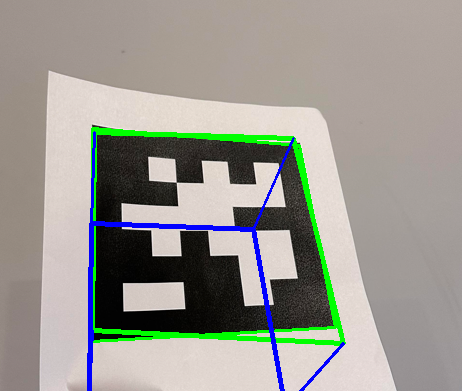

In [ ]:
import cv2
import pyapriltags
import numpy as np
from google.colab.patches import cv2_imshow

at_detector = pyapriltags.Detector(
    searchpath=['apriltags'],
    families='tag36h11',
    nthreads=1,
    quad_decimate=1.0,
    quad_sigma=0.0,
    refine_edges=1,
    decode_sharpening=0.25,
    debug=0
)

image = cv2.imread('tagAR.png')

if image is None:
    print("Error: Unable to load image. Please check the file path.")
    exit()

# Converting the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect AprilTags with pose estimation
tags = at_detector.detect(gray, estimate_tag_pose=True, camera_params=[643.65176459, 633.82067955, 37.5, 46], tag_size=0.15)

# Check if any tags were detected
if tags:
    for tag in tags:
        # Print the pose of the detected tag
        print("Tag ID:", tag.tag_id)
        print("Translation (t):", tag.pose_t)
        print("Rotation (R):", tag.pose_R)

        # Draw the detected tag boundaries
        corners = tag.corners
        corners_int = np.int32(corners)  # Convert corners to int32
        cv2.polylines(image, [corners_int], isClosed=True, color=(0, 255, 0), thickness=2)

        # Project points to visualize the cube
        tag_size = 0.15
        cube_points_3D = np.float32([
            [-tag_size / 2, -tag_size / 2, 0],  # Bottom-left
            [tag_size / 2, -tag_size / 2, 0],   # Bottom-right
            [tag_size / 2, tag_size / 2, 0],    # Top-right
            [-tag_size / 2, tag_size / 2, 0],   # Top-left
            [-tag_size / 2, -tag_size / 2, tag_size],  # Top-left back
            [tag_size / 2, -tag_size / 2, tag_size],   # Top-right back
            [tag_size / 2, tag_size / 2, tag_size],    # Bottom-right back
            [-tag_size / 2, tag_size / 2, tag_size]    # Bottom-left back
        ])

        # Convert the rotation vector to a rotation matrix
        R, _ = cv2.Rodrigues(tag.pose_R)

        # Define the camera matrix
        camera_matrix = np.array([[643.65176459, 0, 37.5],
                                   [0, 633.82067955, 46],
                                   [0, 0, 1]], dtype=np.float32)

        # Define the distortion coefficients
        dist_coeffs = np.zeros((4, 1), dtype=np.float32)

        # Project the 3D points to the image
        imgpts, _ = cv2.projectPoints(cube_points_3D, R, tag.pose_t, camera_matrix, dist_coeffs)

        # Draw the cube base
        imgpts = np.int32(imgpts).reshape(-1, 2)

        # Draw the base square
        cv2.drawContours(image, [imgpts[:4]], -1, (0, 255, 0), 3)  # Base of the cube
        # Draw the top square
        cv2.drawContours(image, [imgpts[4:]], -1, (255, 0, 0), 3)  # Top of the cube

        # Draw the vertical edges to connect base and top
        for i in range(4):
            cv2.line(image, tuple(imgpts[i]), tuple(imgpts[i + 4]), (255, 0, 0), 2)  # Connect base to top

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Tag ID: 1
Translation (t): [[0.13974911]
 [0.08991182]
 [0.23710001]]
Rotation (R): [[-0.26576428  0.96275117  0.04979486]
 [-0.96194683 -0.26823412  0.05204574]
 [ 0.06346378 -0.03406811  0.99740248]]


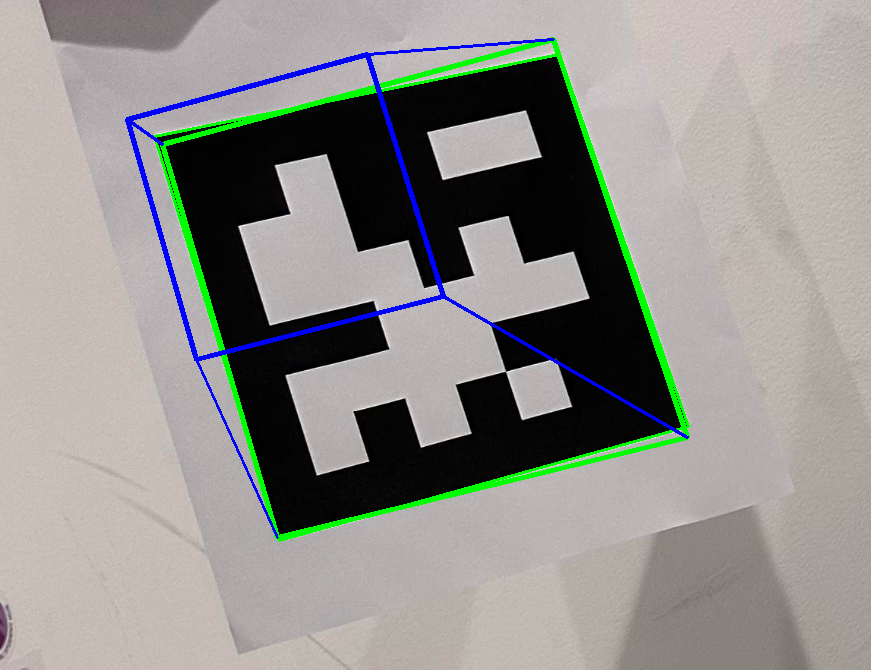

In [ ]:
import cv2
import pyapriltags
import numpy as np
from google.colab.patches import cv2_imshow

at_detector = pyapriltags.Detector(
    searchpath=['apriltags'],
    families='tag36h11',
    nthreads=1,
    quad_decimate=1.0,
    quad_sigma=0.0,
    refine_edges=1,
    decode_sharpening=0.25,
    debug=0
)

image = cv2.imread('tagAR2.png')

if image is None:
    print("Error: Unable to load image. Please check the file path.")
    exit()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect AprilTags with pose estimation
tags = at_detector.detect(gray, estimate_tag_pose=True, camera_params=[643.65176459, 633.82067955, 37.5, 46], tag_size=0.15)

# Check if any tags were detected
if tags:
    for tag in tags:
        # Print the pose of the detected tag
        print("Tag ID:", tag.tag_id)
        print("Translation (t):", tag.pose_t)
        print("Rotation (R):", tag.pose_R)

        # Draw the detected tag boundaries
        corners = tag.corners
        corners_int = np.int32(corners)  # Convert corners to int32
        cv2.polylines(image, [corners_int], isClosed=True, color=(0, 255, 0), thickness=2)

        # Project points to visualize the cube
        tag_size = 0.15
        cube_points_3D = np.float32([
            [-tag_size / 2, -tag_size / 2, 0],  # Bottom-left
            [tag_size / 2, -tag_size / 2, 0],   # Bottom-right
            [tag_size / 2, tag_size / 2, 0],    # Top-right
            [-tag_size / 2, tag_size / 2, 0],   # Top-left
            [-tag_size / 2, -tag_size / 2, tag_size],  # Top-left back
            [tag_size / 2, -tag_size / 2, tag_size],   # Top-right back
            [tag_size / 2, tag_size / 2, tag_size],    # Bottom-right back
            [-tag_size / 2, tag_size / 2, tag_size]    # Bottom-left back
        ])

        # Convert the rotation vector to a rotation matrix
        R, _ = cv2.Rodrigues(tag.pose_R)

        # Define the camera matrix
        camera_matrix = np.array([[643.65176459, 0, 37.5],
                                   [0, 633.82067955, 46],
                                   [0, 0, 1]], dtype=np.float32)

        # Define the distortion coefficients
        dist_coeffs = np.zeros((4, 1), dtype=np.float32)

        # Project the 3D points to the image
        imgpts, _ = cv2.projectPoints(cube_points_3D, R, tag.pose_t, camera_matrix, dist_coeffs)

        # Draw the cube base
        imgpts = np.int32(imgpts).reshape(-1, 2)

        # Draw the base square
        cv2.drawContours(image, [imgpts[:4]], -1, (0, 255, 0), 3)  # Base of the cube
        # Draw the top square
        cv2.drawContours(image, [imgpts[4:]], -1, (255, 0, 0), 3)  # Top of the cube

        # Draw the vertical edges to connect base and top
        for i in range(4):
            cv2.line(image, tuple(imgpts[i]), tuple(imgpts[i + 4]), (255, 0, 0), 2)  # Connect base to top

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Tag ID: 1
Translation (t): [[0.13974911]
 [0.08991182]
 [0.23710001]]
Rotation (R): [[-0.26576428  0.96275117  0.04979486]
 [-0.96194683 -0.26823412  0.05204574]
 [ 0.06346378 -0.03406811  0.99740248]]


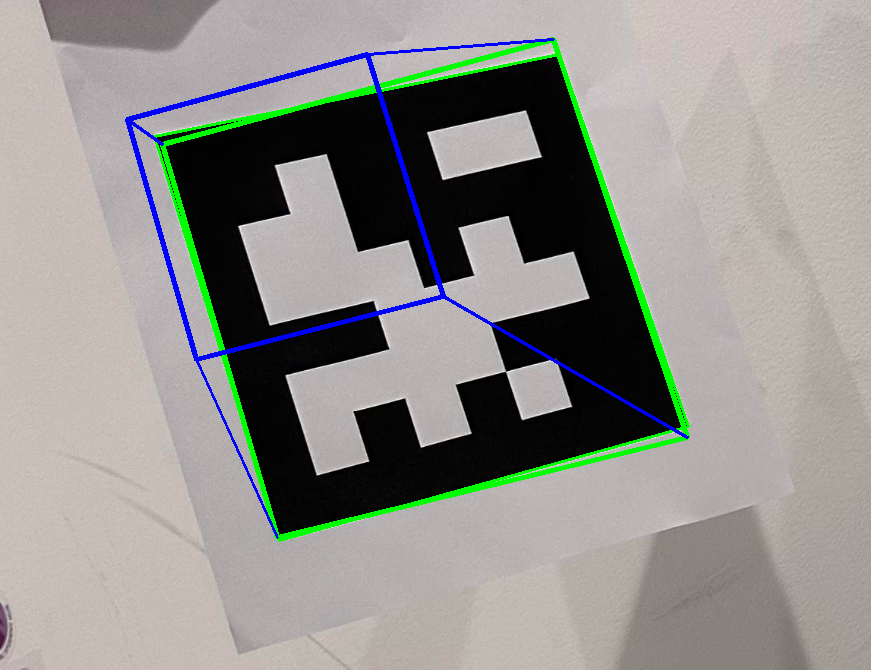

In [ ]:
import cv2
import pyapriltags
import numpy as np
from google.colab.patches import cv2_imshow

at_detector = pyapriltags.Detector(
    searchpath=['apriltags'],
    families='tag36h11',
    nthreads=1,
    quad_decimate=1.0,
    quad_sigma=0.0,
    refine_edges=1,
    decode_sharpening=0.25,
    debug=0
)


image = cv2.imread('tagAR2.png')

if image is None:
    print("Error: Unable to load image. Please check the file path.")
    exit()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect AprilTags with pose estimation
tags = at_detector.detect(gray, estimate_tag_pose=True, camera_params=[643.65176459, 633.82067955, 37.5, 46], tag_size=0.15)

# Check if any tags were detected
if tags:
    for tag in tags:
        # Print the pose of the detected tag
        print("Tag ID:", tag.tag_id)
        print("Translation (t):", tag.pose_t)
        print("Rotation (R):", tag.pose_R)

        # Draw the detected tag boundaries
        corners = tag.corners
        corners_int = np.int32(corners)  # Convert corners to int32
        cv2.polylines(image, [corners_int], isClosed=True, color=(0, 255, 0), thickness=2)

        # Project points to visualize the cube
        tag_size = 0.15
        cube_points_3D = np.float32([
            [-tag_size / 2, -tag_size / 2, 0],  # Bottom-left
            [tag_size / 2, -tag_size / 2, 0],   # Bottom-right
            [tag_size / 2, tag_size / 2, 0],    # Top-right
            [-tag_size / 2, tag_size / 2, 0],   # Top-left
            [-tag_size / 2, -tag_size / 2, tag_size],  # Top-left back
            [tag_size / 2, -tag_size / 2, tag_size],   # Top-right back
            [tag_size / 2, tag_size / 2, tag_size],    # Bottom-right back
            [-tag_size / 2, tag_size / 2, tag_size]    # Bottom-left back
        ])

        # Convert the rotation vector to a rotation matrix
        R, _ = cv2.Rodrigues(tag.pose_R)ss

        # Define the camera matrix
        camera_matrix = np.array([[643.65176459, 0, 37.5],
                                   [0, 633.82067955, 46],
                                   [0, 0, 1]], dtype=np.float32)

        # Define the distortion coefficients (assuming no distortion for simplicity)
        dist_coeffs = np.zeros((4, 1), dtype=np.float32)

        # Project the 3D points to the image
        imgpts, _ = cv2.projectPoints(cube_points_3D, R, tag.pose_t, camera_matrix, dist_coeffs)

        # Draw the cube base
        imgpts = np.int32(imgpts).reshape(-1, 2)

        # Draw the base square
        cv2.drawContours(image, [imgpts[:4]], -1, (0, 255, 0), 3)  # Base of the cube
        # Draw the top square
        cv2.drawContours(image, [imgpts[4:]], -1, (255, 0, 0), 3)  # Top of the cube

        # Draw the vertical edges to connect base and top
        for i in range(4):
            cv2.line(image, tuple(imgpts[i]), tuple(imgpts[i + 4]), (255, 0, 0), 2)  # Connect base to top

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
